In [1]:
import torch
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable

## 2D Convolutional Operation

In [2]:
B = [[ 1,  3,  1,  3,  5,  4], [ 0,  3,  1,  3,  0,  0], [ 20,  3,  1,  3,  -1,  -1],
     [ 2,  0,  1,  -3,  5,  4], [ -2,  0,  0,  -7,  1,  2], [ 10,  0,  0,  0,  1,  8]]

In [3]:
# here is a 6x6 matrix
A = torch.FloatTensor(B)
# here is a 3x3 filter or kernel
f = torch.FloatTensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [4]:
f


 1  0 -1
 1  0 -1
 1  0 -1
[torch.FloatTensor of size 3x3]

In [5]:
A


  1   3   1   3   5   4
  0   3   1   3   0   0
 20   3   1   3  -1  -1
  2   0   1  -3   5   4
 -2   0   0  -7   1   2
 10   0   0   0   1   8
[torch.FloatTensor of size 6x6]

Here is the convolution of `A` and `f` which is a 4x4 tensor.

In [6]:
F.conv2d(Variable(A.view(1,1,6,6)),Variable(f.view(1,1,3,3)))

Variable containing:
(0 ,0 ,.,.) = 
  18   0  -1   6
  19   3  -1   0
  18  10  -3 -12
   9  10  -6 -24
[torch.FloatTensor of size 1x1x4x4]

To compute the first element of the output tensor we compute the element wise multiplication of the top 3x3 sub-matrix of `A` (defined below) and `f` and then sum the results.

In [7]:
A1 = [ [1,  3,  1], [ 0,  3,  1], [20,  3,  1]]

**Question:** What is the size of the output tensor after a convolution of a $n \times n$ tensor with a $f x f$ filter?

You can check that is $(n - f + 1) \times (n - f + 1)$. That is why we get a 6 - 3+ 1 = 4, that is a $4 \times 4$ tensor.

## Edge detector
Here is an illustration on how the filter `f` can be seeing as an edge detector.

In [8]:
import matplotlib.pyplot as plt

In [9]:
b = [10, 10, 10, 0, 0, 0]
B = np.array([b, b, b, b, b, b])
A = torch.FloatTensor(B)
B

array([[10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0]])

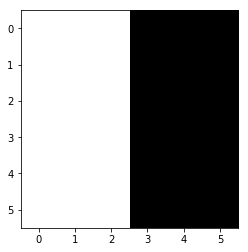

In [10]:
plt.imshow(B, cmap=plt.cm.gray)

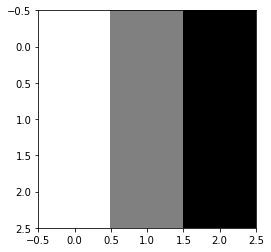

In [11]:
plt.imshow(f, cmap=plt.cm.gray)

In [12]:
C = F.conv2d(Variable(A.view(1,1,6,6)),Variable(f.view(1,1,3,3)))
C

Variable containing:
(0 ,0 ,.,.) = 
   0  30  30   0
   0  30  30   0
   0  30  30   0
   0  30  30   0
[torch.FloatTensor of size 1x1x4x4]

In [13]:
D = C.data
D = D.numpy()
D = D.reshape((4,4))

Here is our edge.

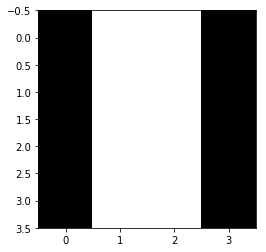

In [14]:
plt.imshow(D, cmap=plt.cm.gray)

## Padding 
Padding is an operation that adds a border with zeros around the image. Padding is important for these reasons:

* Padding allow the size of the output of a convolution to be the same as the size of the input. This is specially important when building deep neural networks.
* Without padding the interior pixes are used more than the edges pixes.

In [15]:
F.conv2d(Variable(A.view(1,1,6,6)),Variable(f.view(1,1,3,3)), padding=1)

Variable containing:
(0 ,0 ,.,.) = 
 -20   0  20  20   0   0
 -30   0  30  30   0   0
 -30   0  30  30   0   0
 -30   0  30  30   0   0
 -30   0  30  30   0   0
 -20   0  20  20   0   0
[torch.FloatTensor of size 1x1x6x6]

**Question:** What is the size of the output tensor after a convolution of a $n \times n$ tensor with a $f x f$ filter if we use padding?

You can check that it is $(n - f + 1 + 2p) \times (n - f + 1 + 2p)$. That is why we get a $6 - 3 + 1 + 2 = 6$, that is a $6 \times 6$ tensor.

**Choice of convolutions type:**
    * "Valid": means no padding.
    * "Same": Pad so that the output size is the same and the input size. 
    
For "Same" convolution you want $n -f + 1 + 2p = n$ this implies $p = \frac{f-1}{2}$. That is one of the reasons you may want to use odd filter size. Filter size are typically 3, 5, 7, 9, 11.

## Stride
Stride controls how the filter convolves around the input. In the previous examples, the filter convolves around the input by shifting one unit at a time. The amount by which the filter shifts is the stride. 

In [16]:
F.conv2d(Variable(A.view(1,1,6,6)),Variable(f.view(1,1,3,3)), padding=0, stride=2)

Variable containing:
(0 ,0 ,.,.) = 
   0  30
   0  30
[torch.FloatTensor of size 1x1x2x2]

The final output has dimensions $(\frac{n-f + 2p}{s} + 1) \times (\frac{n-f + 2p}{s} + 1)$. If the fraction is not an integer we take the floor of that number. 

## Color images

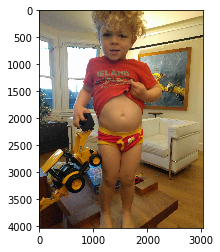

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imread("Ari.jpg")
plt.imshow(img)

In [36]:
img.shape

(4032, 3024, 3)

In [25]:
# take one channel
A = img[:,:,0]
A.shape

(4032, 3024)

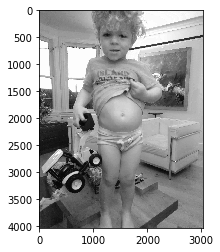

In [20]:
plt.imshow(A, cmap=plt.cm.gray)

In [21]:
A1 = torch.FloatTensor(A).view(1,1,4032,3024)
f1 = f.view(1,1,3,3)
C = F.conv2d(Variable(A1), Variable(f1))

In [22]:
C.size()

torch.Size([1, 1, 4030, 3022])

In [23]:
D = C.data
D = D.numpy()
D = D.reshape((4030, 3022))

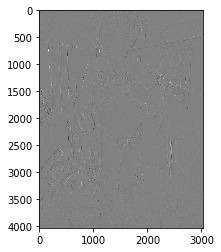

In [24]:
plt.imshow(D, cmap=plt.cm.gray)

In [33]:
f3 = torch.cat((f1, f1, f1), 1)

In [34]:
f3.size()

torch.Size([1, 3, 3, 3])

In [38]:
A3 = torch.FloatTensor(img).view(1,3,4032,3024)
C3 = F.conv2d(Variable(A3), Variable(f3))

In [40]:
C3.size()

torch.Size([1, 1, 4030, 3022])

In [41]:
D = C3.data
D = D.numpy()
D = D.reshape((4030, 3022))

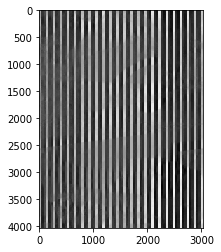

In [42]:
plt.imshow(D, cmap=plt.cm.gray)

Note the dimensions of the convolution.

## Max pooling 

In [43]:
B = [[ 1,  3,  1,  3,  5,  4], [ 0,  3,  1,  3,  0,  0], [ 20,  3,  1,  3,  -1,  -1],
     [ 2,  0,  1,  -3,  5,  4], [ -2,  0,  0,  -7,  1,  2], [ 10,  0,  0,  0,  1,  8]]
A = torch.FloatTensor(B)
A


  1   3   1   3   5   4
  0   3   1   3   0   0
 20   3   1   3  -1  -1
  2   0   1  -3   5   4
 -2   0   0  -7   1   2
 10   0   0   0   1   8
[torch.FloatTensor of size 6x6]

In [52]:
F.max_pool2d(Variable(A.view(1,1,6,6)), kernel_size=2, stride=2)

Variable containing:
(0 ,0 ,.,.) = 
   3   3   5
  20   3   5
  10   0   8
[torch.FloatTensor of size 1x1x3x3]

In [53]:
F.max_pool2d(Variable(A.view(1,1,6,6)), kernel_size=3, stride=1)

Variable containing:
(0 ,0 ,.,.) = 
  20   3   5   5
  20   3   5   5
  20   3   5   5
  10   1   5   8
[torch.FloatTensor of size 1x1x4x4]